"El Impacto de la Distancia a Cuerpos de Agua en los Niveles de Ruido en Bilbao"

Hipótesis Central

La proximidad a cuerpos de agua, como ríos y embalses, tiene un efecto significativo en la reducción de los niveles de ruido en la ciudad de Bilbao. Se espera que las áreas cercanas a cuerpos de agua muestren niveles de ruido considerablemente más bajos en comparación con áreas urbanas densamente pobladas o áreas alejadas de cuerpos de agua. Esta relación sugiere que el agua actúa como un amortiguador natural del sonido y desempeña un papel importante en la creación de entornos urbanos más silenciosos y agradables.

Datasets

Dataset 1: Sonómetros de la red de Bilbao - Mediciones

Información de las mediciones en decibelios registradas por cada uno de los sonómetros (sensores de ruido) de Bilbao en los últimos 30 días a intervalos de quince minutos.

Fecha de actualización: 19/10/2023

Dataset 2: Sonómetros de la red de Bilbao - Ubicación

Relación de sonómetros (sensores de ruido) instalados en Bilbao.

Fecha de actualización: 19/10/2023

Proceso de limpieza de los datos

In [9]:
!pip install xmltodict


[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
!pip install json

ERROR: Could not find a version that satisfies the requirement json (from versions: none)
ERROR: No matching distribution found for json

[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


- transformar el archivo "sonometros_mediciones" de CSV a JSON

In [1]:
import csv
import json

# Nombre del archivo CSV de entrada
archivo_csv = "sonometros_mediciones.csv"

# Nombre del archivo JSON de salida
archivo_json = "sonometros_mediciones.json"

# Crear una lista para almacenar los datos
datos = {"mediciones": []}

# Leer el archivo CSV y agregar los datos a la lista
with open(archivo_csv, "r") as csv_file:
    csv_reader = csv.DictReader(csv_file, delimiter=';')
    for row in csv_reader:
        datos["mediciones"].append({
            "Codigo": row["Codigo"],
            "Decibelios medidos": float(row["Decibelios medidos"]),
            "Fecha/Hora medicion": row["Fecha/Hora medicion"]
        })

# Guardar la lista como archivo JSON
with open(archivo_json, "w") as json_file:
    json.dump(datos, json_file, indent=4)

print(f"Archivo JSON '{archivo_json}' creado con éxito.")

Archivo JSON 'sonometros_mediciones.json' creado con éxito.


- transformar el archivo "sonometros_ubicación" de GML a JSON

In [11]:
import xmltodict
import json

with open('sonometros_ubicacion.gml', 'r') as gml_file:
    gml_data = gml_file.read()

# Convierte el GML a un diccionario de Python
gml_dict = xmltodict.parse(gml_data)

json_data = json.dumps(gml_dict, indent=4)

with open('sonometros_ubicacion.json', 'w') as json_file:
    json_file.write(json_data)

- crear un mapa con las ubicaciones de los sonómetros

In [13]:
pip install folium

     ---------------------------------------- 0.0/102.3 kB ? eta -:--:--
     ----------------------- --------------- 61.4/102.3 kB 1.7 MB/s eta 0:00:01
     -------------------------------------- 102.3/102.3 kB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 0.0/133.1 kB ? eta -:--:--
     -------------------------------- ----- 112.6/133.1 kB 6.4 MB/s eta 0:00:01
     -------------------------------- ----- 112.6/133.1 kB 6.4 MB/s eta 0:00:01
     -------------------------------------- 133.1/133.1 kB 1.6 MB/s eta 0:00:00
  Obtaining dependency information for MarkupSafe>=2.0 from https://files.pythonhosted.org/packages/be/bb/08b85bc194034efbf572e70c3951549c8eca0ada25363afc154386b5390a/MarkupSafe-2.1.3-cp311-cp311-win_amd64.whl.metadata
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:
import folium
import json

with open('sonometros_ubicacion.json', 'r') as json_file:
    data = json.load(json_file)

latitud = float(data['ogr:FeatureCollection']['gml:featureMember'][0]['ogr:sonometro']['ogr:latitude'])
longitud = float(data['ogr:FeatureCollection']['gml:featureMember'][0]['ogr:sonometro']['ogr:longitude'])
m = folium.Map(location=[latitud, longitud], zoom_start=10)

for feature_member in data['ogr:FeatureCollection']['gml:featureMember']:
    sonometro = feature_member['ogr:sonometro']
    nombre = sonometro['ogr:name']
    lat = float(sonometro['ogr:latitude'])
    lon = float(sonometro['ogr:longitude'])

    folium.Marker([lat, lon], popup=nombre).add_to(m)

m.save('mapa_sonometros.html')

In [32]:
display(m)

Se infiere a partir del mapa que los sonometros adyacentes a la ría de bilbao son:
- BI-RUI-023
- BI-RUI-P011
- BI-RUI-C008
- BI-RUI-BR5
- BI-RUI-C003
- BI-RUI-BR7

Sacar las mediciones de los sonometros cercanos a la ría

In [5]:
import json

# Códigos de sonómetros que deseas filtrar
sonometros_deseados = ["BI-RUI-023", "BI-RUI-P011", "BI-RUI-C008", "BI-RUI-BR5", "BI-RUI-C003", "BI-RUI-BR7"]

# Cargar el archivo "sonometros_mediciones.json"
with open('sonometros_mediciones.json') as f:
    data = json.load(f)

# Filtrar las mediciones de los sonómetros deseados
mediciones_filtradas = [medicion for medicion in data['mediciones'] if medicion['Codigo'] in sonometros_deseados]

# Imprimir las mediciones filtradas
for medicion in mediciones_filtradas:
    print(medicion)


{'Codigo': 'BI-RUI-BR5', 'Decibelios medidos': 54.779, 'Fecha/Hora medicion': '2023-09-19 00:04:23.167'}
{'Codigo': 'BI-RUI-C008', 'Decibelios medidos': 49.7, 'Fecha/Hora medicion': '2023-09-19 00:07:29.49'}
{'Codigo': 'BI-RUI-023', 'Decibelios medidos': 72.689, 'Fecha/Hora medicion': '2023-09-19 00:09:41.46'}
{'Codigo': 'BI-RUI-BR7', 'Decibelios medidos': 52.007, 'Fecha/Hora medicion': '2023-09-19 00:10:24.997'}
{'Codigo': 'BI-RUI-P011', 'Decibelios medidos': 58.2, 'Fecha/Hora medicion': '2023-09-19 00:14:46.66'}
{'Codigo': 'BI-RUI-BR5', 'Decibelios medidos': 55.135, 'Fecha/Hora medicion': '2023-09-19 00:19:20.01'}
{'Codigo': 'BI-RUI-C008', 'Decibelios medidos': 49.2, 'Fecha/Hora medicion': '2023-09-19 00:22:45.757'}
{'Codigo': 'BI-RUI-023', 'Decibelios medidos': 65.357, 'Fecha/Hora medicion': '2023-09-19 00:24:35.713'}
{'Codigo': 'BI-RUI-BR7', 'Decibelios medidos': 51.689, 'Fecha/Hora medicion': '2023-09-19 00:25:22.593'}
{'Codigo': 'BI-RUI-P011', 'Decibelios medidos': 68.8, 'Fecha/H

- comparación de los 6 sonometros adyacentes a la ría con 6 sonometros aleatorios distintos 

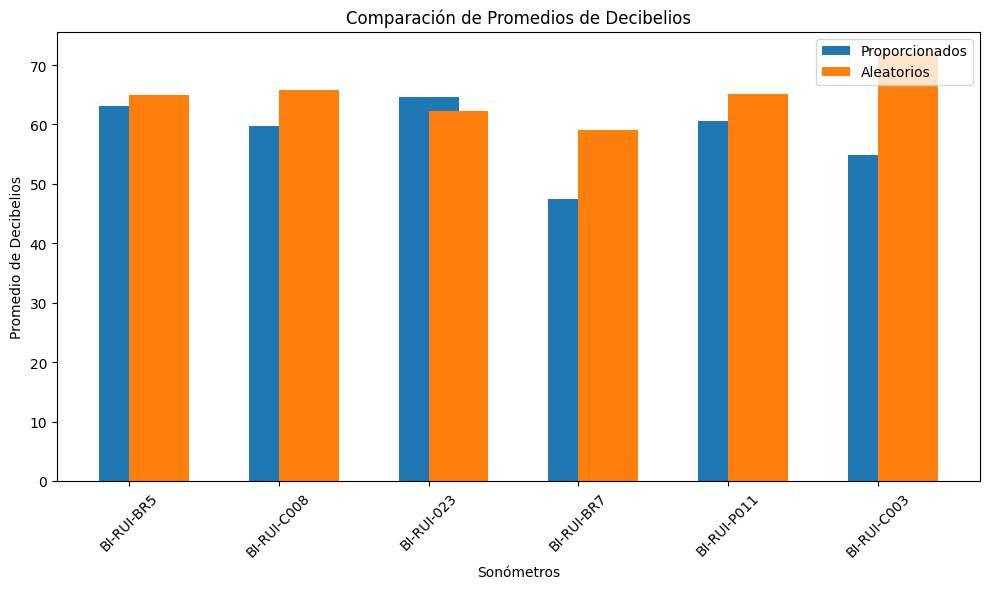

In [6]:
import json
import random
import matplotlib.pyplot as plt

# Cargar el archivo "sonometros_mediciones.json"
with open('sonometros_mediciones.json') as f:
    data = json.load(f)

# Sonómetros proporcionados
sonometros_proporcionados = ["BI-RUI-023", "BI-RUI-P011", "BI-RUI-C008", "BI-RUI-BR5", "BI-RUI-C003", "BI-RUI-BR7"]

# Selecciona aleatoriamente 6 sonómetros que no estén en la lista de proporcionados
sonometros_aleatorios = random.sample([medicion['Codigo'] for medicion in data['mediciones'] if medicion['Codigo'] not in sonometros_proporcionados], 6)

# Inicializa diccionarios para almacenar las mediciones de los dos grupos
mediciones_proporcionados = {}
mediciones_aleatorios = {}

# Agrupa las mediciones por sonómetro para ambos grupos
for medicion in data['mediciones']:
    codigo = medicion['Codigo']
    decibelios = medicion['Decibelios medidos']
    
    if codigo in sonometros_proporcionados:
        if codigo not in mediciones_proporcionados:
            mediciones_proporcionados[codigo] = []
        mediciones_proporcionados[codigo].append(decibelios)
    elif codigo in sonometros_aleatorios:
        if codigo not in mediciones_aleatorios:
            mediciones_aleatorios[codigo] = []
        mediciones_aleatorios[codigo].append(decibelios)

# Calcula el promedio de las mediciones para ambos grupos
promedios_proporcionados = {codigo: sum(med)/len(med) for codigo, med in mediciones_proporcionados.items()}
promedios_aleatorios = {codigo: sum(med)/len(med) for codigo, med in mediciones_aleatorios.items()}

# Etiquetas de los sonómetros para el gráfico
etiquetas = list(promedios_proporcionados.keys())

# Valores de los promedios de decibelios para el gráfico
promedios_proporcionados = list(promedios_proporcionados.values())
promedios_aleatorios = list(promedios_aleatorios.values())

# Crear un gráfico de barras
plt.figure(figsize=(10, 6))
x = range(len(etiquetas))
plt.bar(x, promedios_proporcionados, width=0.4, label='Proporcionados', align='center')
plt.bar(x, promedios_aleatorios, width=0.4, label='Aleatorios', align='edge')
plt.xticks(x, etiquetas, rotation=45)
plt.xlabel('Sonómetros')
plt.ylabel('Promedio de Decibelios')
plt.legend(loc='upper right')
plt.title('Comparación de Promedios de Decibelios')
plt.tight_layout()

# Mostrar el gráfico
plt.show()

- Comparacion por promedios de los 6 sonometros adyacentes a la ría con 6 sonometros aleatorios distintos 

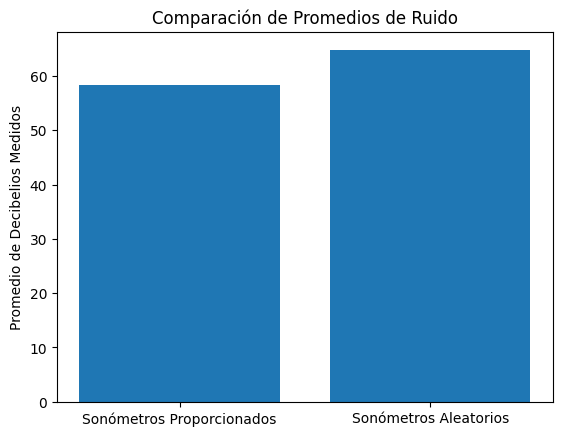

In [9]:
import json
import random
import matplotlib.pyplot as plt

# Cargar el archivo "sonometros_mediciones.json"
with open('sonometros_mediciones.json') as f:
    data = json.load(f)

# Filtrar las mediciones de los sonómetros proporcionados
sonometros_proporcionados = ["BI-RUI-023", "BI-RUI-P011", "BI-RUI-C008", "BI-RUI-BR5", "BI-RUI-C003", "BI-RUI-BR7"]
mediciones_proporcionados = [medicion for medicion in data['mediciones'] if medicion['Codigo'] in sonometros_proporcionados]

# Calcular el promedio de las mediciones de los sonómetros proporcionados
promedio_proporcionados = sum(medicion['Decibelios medidos'] for medicion in mediciones_proporcionados) / len(mediciones_proporcionados)

# Filtrar 6 sonómetros aleatorios distintos a los proporcionados
sonometros_disponibles = [medicion for medicion in data['mediciones'] if medicion['Codigo'] not in sonometros_proporcionados]
sonometros_aleatorios = random.sample(sonometros_disponibles, 6)

# Calcular el promedio de las mediciones de los sonómetros aleatorios
promedio_aleatorios = sum(medicion['Decibelios medidos'] for medicion in sonometros_aleatorios) / 6

# Crear un gráfico para comparar los promedios
etiquetas = ['Sonómetros Proporcionados', 'Sonómetros Aleatorios']
promedios = [promedio_proporcionados, promedio_aleatorios]

plt.bar(etiquetas, promedios)
plt.ylabel('Promedio de Decibelios Medidos')
plt.title('Comparación de Promedios de Ruido')
plt.show()

- Comparación del promedio de los 6 sonometros adyacentes vs. el promedio total de sonometros no adyacentes a la Ría

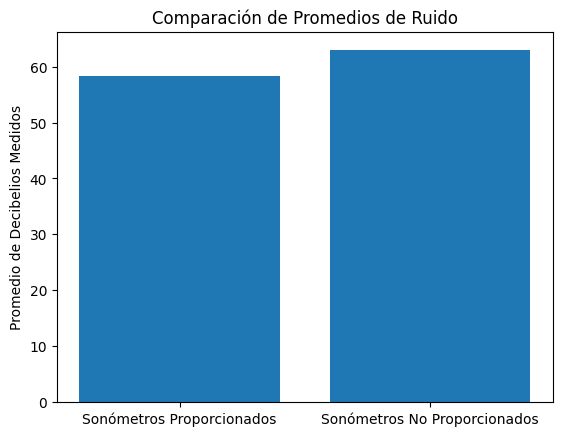

In [33]:
import json
import matplotlib.pyplot as plt

# Cargar el archivo "sonometros_mediciones.json"
with open('sonometros_mediciones.json') as f:
    data = json.load(f)

# Filtrar las mediciones de los sonómetros proporcionados
sonometros_proporcionados = ["BI-RUI-023", "BI-RUI-P011", "BI-RUI-C008", "BI-RUI-BR5", "BI-RUI-C003", "BI-RUI-BR7"]
mediciones_proporcionados = [medicion for medicion in data['mediciones'] if medicion['Codigo'] in sonometros_proporcionados]

# Calcular el promedio de las mediciones de los sonómetros proporcionados
promedio_proporcionados = sum(medicion['Decibelios medidos'] for medicion in mediciones_proporcionados) / len(mediciones_proporcionados)

# Filtrar las mediciones de los sonómetros no proporcionados
sonometros_no_proporcionados = [medicion for medicion in data['mediciones'] if medicion['Codigo'] not in sonometros_proporcionados]

# Calcular el promedio de las mediciones de los sonómetros no proporcionados
promedio_no_proporcionados = sum(medicion['Decibelios medidos'] for medicion in sonometros_no_proporcionados) / len(sonometros_no_proporcionados)

# Crear un gráfico para comparar los promedios
etiquetas = ['Sonómetros Proporcionados', 'Sonómetros No Proporcionados']
promedios = [promedio_proporcionados, promedio_no_proporcionados]

plt.bar(etiquetas, promedios)
plt.ylabel('Promedio de Decibelios Medidos')
plt.title('Comparación de Promedios de Ruido')
plt.show()